## Inferenz für zwei Grundgesamtheitsmittelwerte unter Verwendung unabhängiger Stichproben; Standardabweichungen werden als gleich angenommen
----------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t
from scipy import stats
import statsmodels.api as smi
import pylab

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


In diesem Abschnitt führen wir einen Hypothesentest für die Mittelwerte von zwei Grundgesamtheiten durch. Wir gehen davon aus, dass die Standardabweichungen der beiden Grundgesamtheiten gleich, aber unbekannt sind. Wenn wir jedoch $\sigma$ und die Differenz der Stichprobenmittelwerte ($\bar{x}_1-\bar{x}_2$) kennen würden, könnte die Teststatistik wie folgt geschrieben werden.

$$z = \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

In fast allen realen Anwendungen kennen wir $\sigma$ jedoch nicht. Daher müssen wir es im Voraus schätzen. Das geht am besten, wenn man die Stichprobenvarianzen $s^2_1$ und $s^2_2$ als zwei Schätzungen für $\sigma^2$ betrachtet. Durch Zusammenfassen der beiden Stichprobenabweichungen und Gewichtung nach dem Stichprobenumfang ergibt sich der Schätzwert für $\sigma^2$ wie folgt

$$s_z^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}\text{,}$$

und durch Ziehen der Quadratwurzel erhalten wir

$$s_z = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}\text{,}$$

Die Größe $s_z$ wird als Standardabweichung der <a href="https://en.wikipedia.org/wiki/Pooled_variance">zusammengefassten Stichprobe</a> bezeichnet, wobei der tiefgestellte Index $z$ für **zusammengefasst** steht.

Die Ersetzung von $\sigma$ in der obigen Gleichung durch seine Schätzung $s_z$ ergibt

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

Der Nenner der Gleichung $s_z \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$ ist der Schätzer der Standardabweichung von $\bar{x}_1-\bar{x}_2$, der wie folgt geschrieben werden kann

$$s_{\bar x_1 - \bar x_2} = s_z \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

Bitte beachten Sie, dass die Gleichung für die Teststatistik $t$ einer $t$-Verteilung folgt. Die Freiheitsgrade ($df$) sind gegeben durch

$$df = n_1+n_2-2$$

### Intervall-Schätzung von $\mu_1-\mu_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_1-\mu_2$ ist gegeben durch

$$(\bar x_1 - \bar x_2) \pm t \times s_z \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}\text{,}$$

wobei sich der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n_1+n_2-2$ Freiheitsgrade ergibt.

### Der zusammengefasste $t$-Test: Ein Beispiel

Python ermöglicht es uns, einen **zusammengefassten $t$-Test** durchzuführen, indem wir die Funktion `ttest_ind()`, die wir bereits für einen $t$-Test mit einem Mittelwert verwendet haben, um das Argument `equal_var = True` erweitern.

Um den zusammengefassten $t$-Test zu üben, laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und weisen Sie ihm einen geeigneten Namen zu.

In [3]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc.score, Semester, Hauptfach, Nebenfach, score1, score2, online.tutorial, graduated, salary*.

Um den zusammengefassten $t$-Test zu veranschaulichen, untersuchen wir das mittlere Jahresgehalt (in Euro) der Absolventen. Die erste Grundgesamtheit besteht aus männlichen Studenten und die zweite aus weiblichen Studenten. **Die Frage ist, ob es einen Unterschied im mittleren Jahresgehalt der Absolventen in Bezug auf das Geschlecht gibt?**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

 -   Wir unterteilen den Datensatz anhand der binären Variable `graduated`, die angibt, ob der Student seinen Abschluss bereits gemacht hat. Die ganze Zahl $1$ steht für "abgeschlossen", $0$
bedeutet, dass der Schüler seinen Abschluss noch nicht gemacht hat.
- Dann teilen wir den Datensatz nach Geschlecht auf (männlich und weiblich).
- Dann ziehen wir aus jeder Teilmenge $50$ weibliche und $50$ männliche Studenten und extrahieren die Variable von Interesse, das mittlere Jahresgehalt (in Euro), das in der Spalte Gehalt gespeichert ist. Diese beiden Vektoren ordnen wir den Variablen `male_sample` und `female_sample` zu.

In [4]:
n=50
graduated = students.loc[students['graduated'] == 1]
male = graduated.loc[graduated['gender']== 'Male']
female = graduated.loc[graduated['gender']== 'Female']

male_sample = male['salary'].sample(n=50, random_state=1)
female_sample = female['salary'].sample(n=50, random_state=1)

Außerdem prüfen wir ob die Daten normalverteilt sind, indem wir ein Normalwahrscheinlichkeitsdiagramm erstellen, das oft als Q-Q-Diagramm bezeichnet wird. Wenn die Variable normalverteilt ist, sollte das Q-Q-Diagramm ungefähr linear sein.

In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

Text(0.5, 0, 'abc')

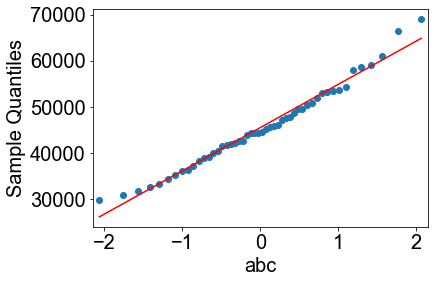

In [5]:
# Erzeuge Q-Q Plot
qqp = smi.qqplot(male_sample, line = "r")
#pylab.show()
ax=qqp.gca()
ax.set_xlabel('abc')

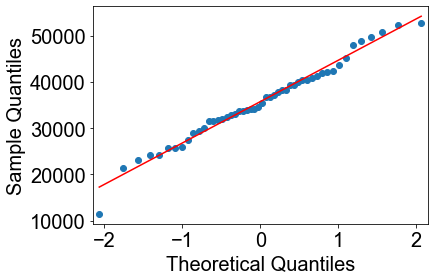

In [6]:
# Erzeuge Q-Q Plot
smi.qqplot(female_sample, line = "r")
pylab.show()

Wir sehen, dass die Stichprobendaten etwas Rauschen beinhalten sind, aber sie sind immer noch ungefähr normalverteilt. Die Abweichung von der Geraden im oberen und unteren Teil deutet darauf hin, dass die Wahrscheinlichkeitsverteilung leicht schief ist.

Außerdem prüfen wir, ob die Standardabweichungen der beiden Grundgesamtheiten ungefähr gleich sind. Als Faustregel gilt, dass die Bedingung gleicher Standardabweichungen der Grundgesamtheit erfüllt ist, wenn das Verhältnis der größeren zur kleineren Standardabweichung der Stichprobe kleiner als $2$ ist (Weiss 2010). Gehen wir davon aus, dass die Daten des `students` Datensatzes eine gute Annäherung an die Grundgesamtheit darstellen.

In [11]:
# Berechne Standardabweichung
np.std(male['salary'],ddof=1)

9657.665902083088

In [12]:
# Berechne Standardabweichung
np.std(female['salary'],ddof=1)

7729.226401336453

In [13]:
# Berechne Verhältnis
np.std(male['salary'],ddof=1)/np.std(female['salary'],ddof=1)

1.2494996783136267

Das Verhältnis liegt bei etwa $1,249$, so dass wir zu dem Schluss kommen, dass das Kriterium der gleichen Standardabweichungen der Bevölkerung erfüllt ist. Eine einfache Visualisierungstechnik zur Bewertung der Streuung einer Variablen ist die Darstellung eines Boxplots.

{'whiskers': [<matplotlib.lines.Line2D at 0x273da38ec80>,
 'caps': [<matplotlib.lines.Line2D at 0x273da38f220>,
 'boxes': [<matplotlib.lines.Line2D at 0x273da38e9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x273da38f7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x273da38fa90>],
 'means': []}

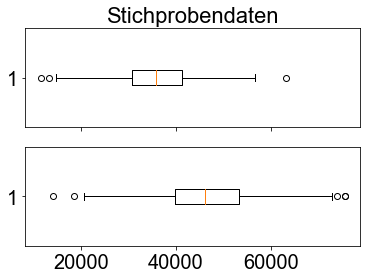

In [14]:
fig1, (ax1,ax2) = plt.subplots(2, sharex= 'all')

ax1.set_title('Stichprobendaten')
ax2.boxplot(male['salary'], vert = False)
ax1.boxplot(female['salary'], vert = False)

### Überprüfung der Hypothesen

Wir führen den zusammengefassten $t$-Test durch, indem wir das schrittweise Durchführungsverfahren für Hypothesentests befolgen.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das durchschnittliche Jahresgehalt der männlichen Absolventen ($μ_1$) gleich dem durchschnittlichen Jahresgehalt der weiblichen Absolventen ($μ_2$) ist.

$$H_0: \quad \mu_1 = \mu_2$$

Es sei daran erinnert, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen. Wir wollen prüfen, ob das Gehalt der männlichen Absolventen ($μ_1$) höher ist als das durchschnittliche Jahresgehalt der weiblichen Absolventen ($μ_2$), daher wird die Alternativhypothese wie folgt formuliert

**Alternative Hypothese**

$$H_A: \quad \mu_1 > \mu_2$$

Aus dieser Formulierung ergibt sich ein rechtsseitiger Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0.01$$

In [15]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben.

$$t =  \frac{(\bar x_1 - \bar x_2)-(\mu_1-\mu_2)}{s_z \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

Wenn $H_0$ wahr ist, dann ist $\mu_1-\mu_2=0$ und somit vereinfacht sich die Gleichung zu

$$t =  \frac{(\bar x_1 - \bar x_2)}{s_z \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}\text{,}$$

wobei $s_z$ gleich

$$s_z = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2 }{n_1+n_2-2}}$$

ist.

In [16]:
# Compute the value of the test statistic
n1 =len(male_sample)
n2 = len(female_sample)
s1 = np.std(male_sample,ddof= 1) 
s2 = np.std(female_sample,ddof= 1) 
x1_bar = np.mean(male_sample)
x2_bar = np.mean(female_sample)
  
sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
tw = (x1_bar-x2_bar)/(sp*np.sqrt(1/n1+1/n2))
tw

5.591470345287415

Der numerische Wert der Teststatistik ist $5,59147$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n_1+n_2-2 = 50 + 50 - 2 = 98$$

In [17]:
# Berechne den p-Wert
df = n1+n2-2
p = 1-t.cdf(tw, df = df)
p

1.0169269359927569e-07

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [18]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,0169269 \cdot 10^{-7}$; Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass das Durchschnittsgehalt männlicher Studenten höher ist als das Durchschnittsgehalt weiblicher Studenten.

### Hypothesentests in Python

Wir haben soeben manuell einen zusammengefassten $t$-Test in Python durchgeführt. Bitte beachten Sie jedoch, dass wir die volle Leistungsfähigkeit von Python nutzen können, um das gleiche Ergebnis wie oben in nur einer Zeile Code zu erhalten!

Um einen zusammengefassten $t$-Test in Python durchzuführen, verwenden wir die Funktion `ttest_ind()`. Wir geben zwei Vektoren als Dateneingabe an und setzen `equal_var=True`, um explizit anzugeben, dass wir die zusammengefasste Version des $t$-Tests anwenden, und wir setzen das Argument `alternative` auf `alternative=greater`, um $H_A$ widerzuspiegeln:$\mu1 \gt \mu2$

In [19]:
stats.ttest_ind(male_sample, female_sample, equal_var=True, alternative = 'greater')

Ttest_indResult(statistic=5.591470345287416, pvalue=1.0169269353574991e-07)

Ein großer Erfolg! Vergleichen Sie die Ausgabe der Funktion `ttest_ind()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass bei einem Signifikanzniveau von $1 \%$ die Daten einen sehr starken Hinweis darauf liefern, dass das Durchschnittsgehalt der männlichen Absolventen höher ist als das der weiblichen Absolventen.